<a href="https://colab.research.google.com/github/77reena/Reena-Naik-ML-and-AI/blob/main/ridge_and_lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
# Loading data
dataset=pd.read_csv("/content/Boston (1).csv")
dataset.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [11]:
# prompt: Using dataframe dataset: drop column Unnamed

dataset.drop(columns=['Unnamed: 0'], inplace=True)


In [13]:
#Separating
x= dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.20)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [17]:
# Apply a normal linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# predicting on test
model_prediction = model.predict(X_test)

In [20]:
# calculating Mean Squared Error (mse)
R_squared = r2_score(model_prediction,Y_test)
print("R squared Error on test set : ", R_squared)

R squared Error on test set :  0.4606760735716354


In [21]:
# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(model.coef_)
print(coefficient_df.head(15))

   Column_Name  Coefficient_Value
0         crim          -0.114430
1           zn           0.031503
2        indus           0.037893
3         chas           2.092895
4          nox         -15.735147
5           rm           4.778213
6          age          -0.004605
7          dis          -1.332520
8          rad           0.280256
9          tax          -0.010660
10     ptratio          -0.899247
11       black           0.011355
12       lstat          -0.473010


<BarContainer object of 13 artists>

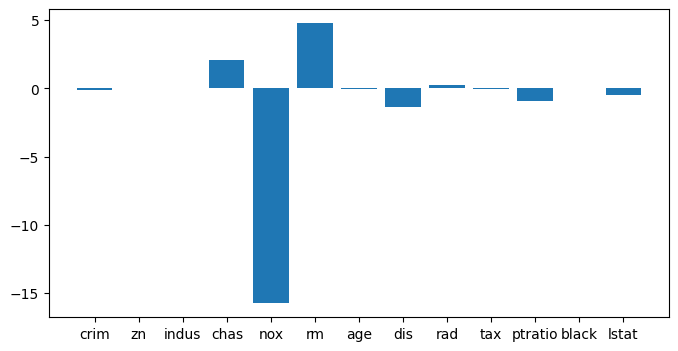

In [23]:
plt.rcParams["figure.figsize"] = (8,4)

plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])


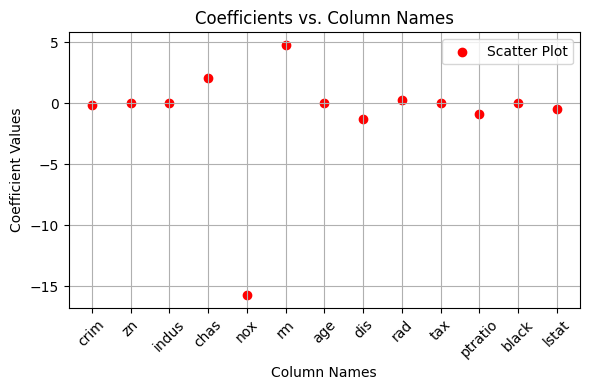

In [30]:

# Set figure size
plt.rcParams["figure.figsize"] = (6, 4)

# Draw scatter plot
plt.scatter(coefficient_df["Column_Name"], coefficient_df["Coefficient_Value"], color='red', label='Scatter Plot')

# Add labels and title
plt.title('Coefficients vs. Column Names')
plt.xlabel('Column Names')
plt.ylabel('Coefficient Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# import ridge regression library
from sklearn.linear_model import Ridge

In [32]:
# Train the model
ridgemodel = Ridge(alpha = 0.5) #here setting alpha 1
ridgemodel.fit(X_train, Y_train)
y_predicted_ridge = ridgemodel.predict(X_test)

In [33]:
# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_ridge,Y_test)
print("R squared Error on test set : ", R_squared)

R squared Error on test set :  0.4566957922972241


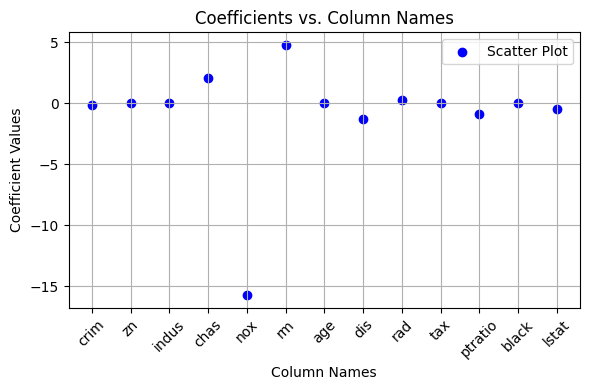

In [34]:
# Draw scatter plot
plt.scatter(coefficient_df["Column_Name"], coefficient_df["Coefficient_Value"], color='blue', label='Scatter Plot')

# Add labels and title
plt.title('Coefficients vs. Column Names')
plt.xlabel('Column Names')
plt.ylabel('Coefficient Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

   Column_Name  Coefficient_Value
0         crim          -0.111704
1           zn           0.032452
2        indus           0.018607
3         chas           1.983703
4          nox         -11.131431
5           rm           4.811482
6          age          -0.008213
7          dis          -1.262816
8          rad           0.266289
9          tax          -0.010891
10     ptratio          -0.848531
11       black           0.011603
12       lstat          -0.480224


<BarContainer object of 13 artists>

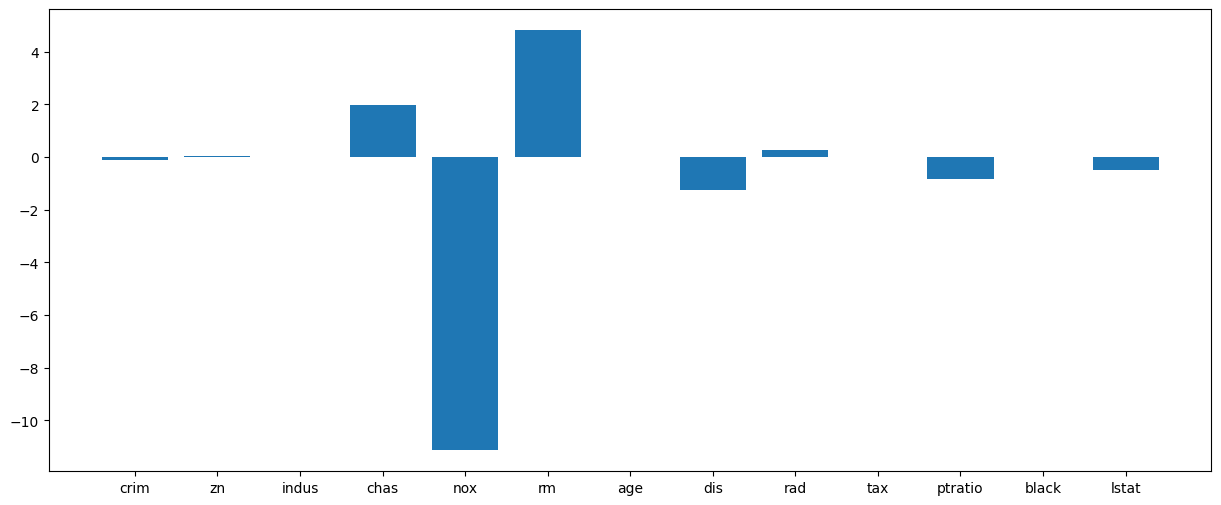

In [35]:
# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(ridgemodel.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)

plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

In [36]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [37]:
# Train the model
lassoModel = Lasso(alpha = 1) #here setting alpha
lassoModel.fit(X_train, Y_train)
y_predicted_lasso = lassoModel.predict(X_test)

In [38]:
# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,Y_test)
print("R squared Error on test set : ", R_squared)

R squared Error on test set :  0.288003333604819


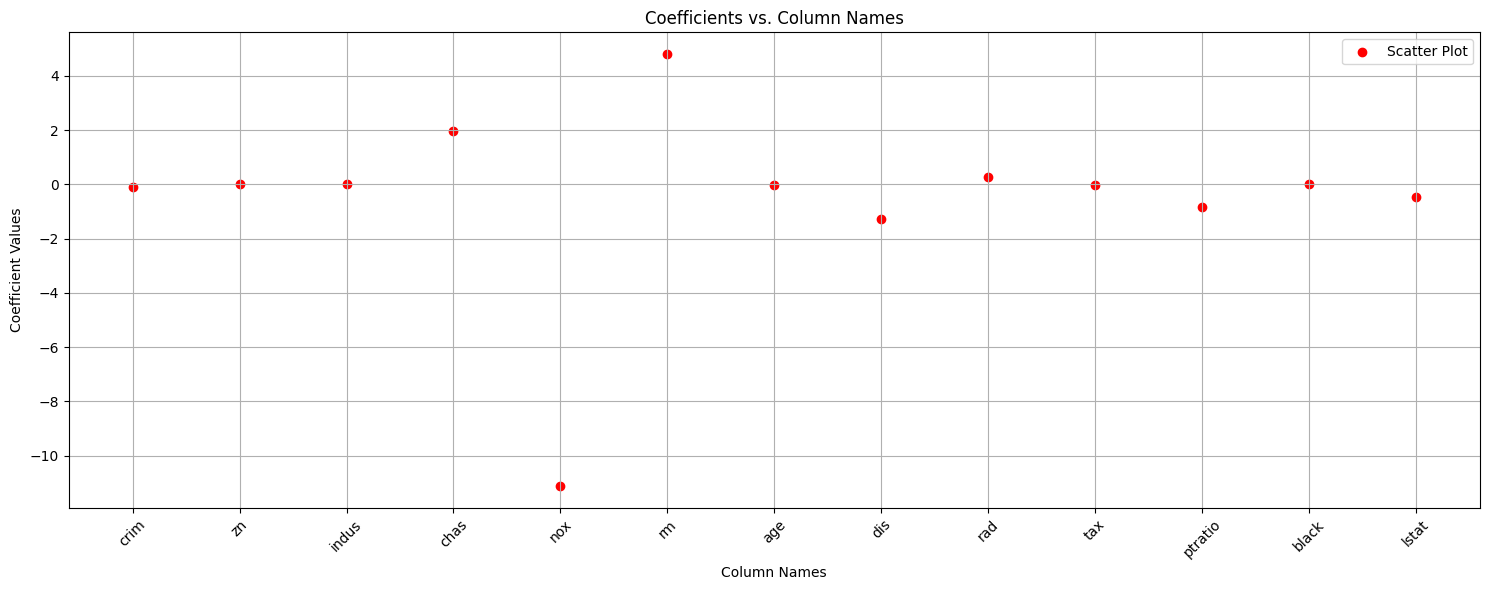

In [39]:
# Draw scatter plot
plt.scatter(coefficient_df["Column_Name"], coefficient_df["Coefficient_Value"], color='red', label='Scatter Plot')

# Add labels and title
plt.title('Coefficients vs. Column Names')
plt.xlabel('Column Names')
plt.ylabel('Coefficient Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

   Column_Name  Coefficient_Value
0         crim          -0.062741
1           zn           0.034883
2        indus          -0.000000
3         chas           0.000000
4          nox          -0.000000
5           rm           1.575845
6          age           0.019911
7          dis          -0.529444
8          rad           0.207112
9          tax          -0.011698
10     ptratio          -0.644072
11       black           0.009552
12       lstat          -0.735228


<BarContainer object of 13 artists>

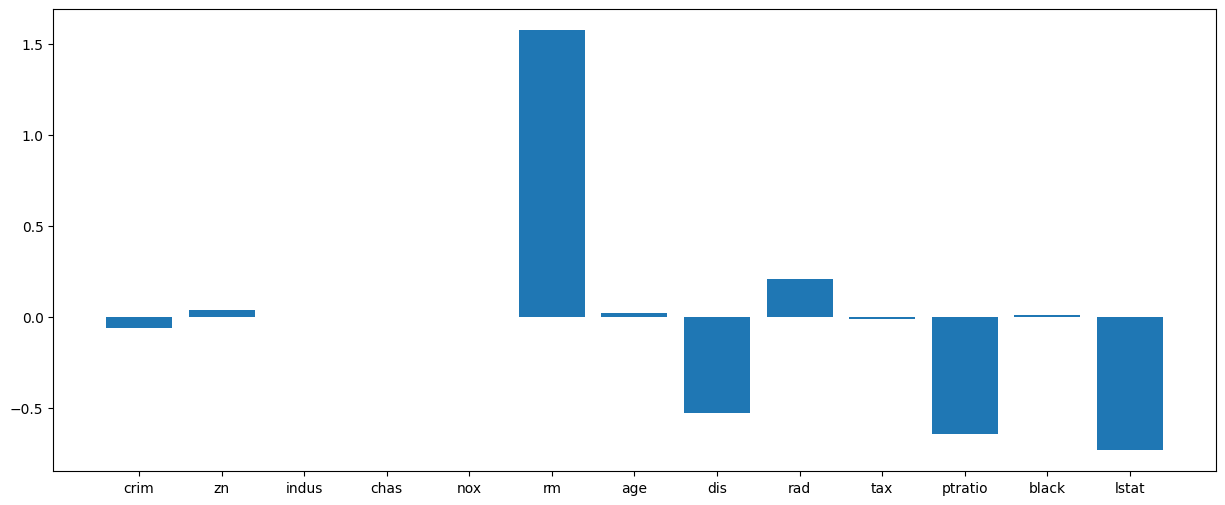

In [40]:
# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lassoModel.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)

plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

In [ ]:
import seaborn as sns
#sns.pairplot(boston_df)
plt.scatter(boston_df['LSTAT'],boston_df['House_Price'])